# 4.3 The Snake Format

4.2 gives an illustration of matchmaking overfitting possibilities, but in a very specific context that has limited practical impact. A common scheduler for online video games is skilled base matchmaking. For a better gaming experience, customers are matched with each other based on their levels. They have similar expected win and lose chances. Can we have a skilled based matchmaking where the consensus ranking does not perfectly align with the expected score or the win probability ?

### 1 Motivation & goals
As scheduler, competitions have a massive upside compared to live matchmaking. It has a start and an end, with an upfront defined amount of games. In live matchmaking, there is no starting nor ending point. The amount of game is at the will of participants. For simulation, this implies a notion of time, a model for players to connect and disconnect. We need moods effects of game results and motivations to win, etc. All these are yet irrelevant regarding the research question, which just focuses on the interdependency of ranking and scheduler.

The Snake format is an attempt to avoid over-modeling. It has a start, an end, and a defined number of games in which participants face opponents of expected similar level. I do not claim inventing it. I have seen it used in two separate context, a french tv cooking show, and at the 2024 Olympics games in Paris for fencing during modern pentathlon. I have seen no documentation nor reference - I do not know its official name. I refer to it as the "snake" format. There is a big difference between the usage in my simulation and the previously mentioned events: I used it as a stand-alone competition, not as a stage of a bigger event.

### 2 Definition


The format takes as input n seeded participants and produces n-1 direct confrontation in a single elimination fashion. The loser of each game is eliminated and does not play further.
The first game involves the **seed n** versus the **seed n-1**. In the second game, seed n-2 facees the winner of the first game, and so on. This gives us a recursive formula/algorithm.


$$
\begin{aligned}
\text{Game}_1 &:= (\text{Seed}_{n-1} \text{ versus } \text{Seed}_n) \\
\text{Game}_2 &:= (\text{Seed}_{n-2} \text{ versus } \text{Winner}_1) \\
&\ \vdots \\
\text{Game}_i &:= (\text{Seed}_{n-i} \text{ versus } \text{Winner}_{i-1}) \\
&\ \vdots \\
\text{Game}_{n-1} &:= (\text{Seed}_1 \text{ versus } \text{Winner}_{n-2})
\end{aligned}
$$


### 3 properties

The format is interesting regarding many aspects. It is important to mention and illustrate them as part of the model documentation process (see step 6, section 2.1.3). These properties should not be forgotten when designing scenarios or interpreting experimental results.
- **(A) Standing – Ranking:**  
  The result of a tournament is a ranking with no ties. The first place goes to $\text{Winner}_{n-1}$, the second to $\text{Winner}_{n-2}$,  
  and $\text{Winner}_{n-3}$ completes the podium. $\text{Loser}_1$ finishes last in the event.

- **(B) Skill-Based Scheduler:**  
  Every game is played between opponents of expected similar skill. $\text{Seed}_i$ faces $\text{Winner}_{i-1}$. “Similar skill” here means each player faces the single undefeated prior weakest opponent. In other words, a player always faces the **best - a priori weakest** remaining opponent.

- **(C) Winner Probability Bias:**  
  The probability for $\text{Player}_i$ to win the competition is a function of their seed. For every player, the lower their seed, the lower their chance to win the competition.

- **(D) Expected Score Bias:**  
  Unlike the win probability, the expected score of a player **increases** with a lower seed.

- **(E) Deterministic Convergence:**  
  Whatever biases (C) and (D) introduce are limited to a single tournament edition. Because the final standing is a ranking, we can use it to seed the next tournament. Assuming a Bradley–Terry model and a deterministic run, the final standing of the $N^{\text{th}}$ event is the **Consensus Ranking**.

- **(F) Probabilistic Convergence:**  
  Statement (E) also holds reasonably well under a probabilistic run.


#### **4 Convergence Theorem**


---

Let us consider a population of $n$ ordered players
$\text{Player}_1, \text{Player}_2, \ldots, \text{Player}_n$
such that $\text{Player}_i$ wins against $\text{Player}_j$  
if and only if $i < j$.

We consider the **snake format** as defined in above,  
and play $n$ editions.

Let:
- $Seed^k_i$ denote the player assigned to seed $i$ in the $k$-th edition.
- $Place^k_j$ denote the player who finished at place $j$ in the $k$-th edition,  
  as defined in Property (A).

**Claim.**  
For any arbitrary initial seeding $\mathcal{S} := \{Seed^1_1, Seed^1_2, \ldots, Seed^1_n\}$, and the recursive seeding rule  
$Seed^i_j = Place^{i-1}_j$, we obtain the final standing $\mathcal{F} := \{Place^n_1, Place^n_2, \ldots, Place^n_n\}$  
such that:


$${Player}_i = Place^n_i, \quad \forall i \in \{1, \ldots, n\}.
$$

In other words, over $n$ editions, the players *sort themselves by skill level*, and the tournament converges to the true ranking.

#### **Proof**

The proof is harder to read and understand than it actually is.  
In fact, it is a simple observation. Some of the difficulty arises from the chosen formalism and from terminology conventions in competitive ranking.  

Indeed, in common language, one refers to *better* or *stronger* players, and to *low* or *high* seeds. The best player has seed **1**, which is numerically the smallest value.  
Thus, inequalities may feel counter intuitive — following the proof requires a bit of mental gymnastics that would not be necessary in spoken explanation.

This section is included for completeness.


**Induction Hypothesis:**  
Assuming that after the $k$-th edition, the top $k$ players are correctly ordered in the final standing:  
$$
\text{Player}_j = \text{Place}^k_j \quad \forall j \leq k.
$$

---

**Base Case ($k = 1$):**  
After the first edition, $\text{Player}_1 = \text{Place}^1_1$.  
This is true because $\text{Player}_1$ is, by definition, the best player and always wins against every other competitor, regardless of the initial seeding.  

Formally, if $\text{Player}_1$ has initial seed $\text{Seed}^1_m$, then he wins any game against $\text{Seed}^1_{m+1}, \text{Seed}^1_{m-1}, \ldots, \text{Seed}^1_1$, and therefore finish in first place: $\text{Player}_1 = \text{Place}^1_1$.

---

**Induction Step:**  
Assume the hypothesis holds for edition $k$, and consider edition $k+1$.

- $\text{Player}_{k+1}$ wins against any player  
  $p \in \{\text{Player}_i \mid i \geq k+1\} = \{\text{Seed}^{k+1}_i \mid i \geq k+1\}$  
  and therefore becomes $\text{Winner}_{n - k - 1}$ in this edition.

- Conversely, $\text{Player}_{k+1}$ loses against all players  
  $p \in \{\text{Player}_j \mid j \leq k\} = \{\text{Place}^k_j \mid j \leq k\} = \{\text{Seed}^{k+1}_j \mid j < k+1\}.$

    First equality holds due to the induction hypothesis, the seconds holds by the seeding procedure defined.

Hence, $\text{Player}_{k+1}$ loses against $\text{Seed}^{k+1}_k$  
thus, according to property (A), occupies position $k+1$ in the final standing:
$$
\text{Player}_{k+1} = \text{Place}^{k+1}_{k+1}.
$$

---

This completes the induction.  
Therefore, after $n$ editions, the final ranking is perfectly sorted by player strength:
$$
\text{Player}_i = \text{Place}^n_i, \quad \forall i \in \{1, \ldots, n\}.
$$

### 5. Model Validation

I illustrate the following Snake properties:<br>
**(B) Skilled Based Scheduler**<br>
**(E) Deterministic Convergence**<br>
**and (F) Probabilistic Convergence**.

I show that the Snake competition is a skilled based Scheduler in which players are naturally sorted by strength.

The claims (C) and (D) are important to understand the motivation and idea behind the scheduler design.However, I cannot provide a good illustration of it. This would require a meaningful metric. There is not one because, well, the matchmaking overfitting is a hypothesis proposed by this thesis. Expected Score and Win probability are problematic because they are defined for competition, not matchmaking. Also, many ranking, including TrueSkill update ratings continuously, one after the other, there is no notion of game batches, which is necessary for these two metrics. They require knowledge measuring the bias of a dataset. It is a potential (challenging) future work.

This is not an issue for simulation run. The general assumption is that matchmaking does not introduce bias in a game dataset. Whether the Snake format introduces one or not is irrelevant regarding the run itself nor the generated data. It is relevant when interpreting results. Independently of what is observed, no conclusion can be made regarding a learned bias as this would assume the existence of such bias! But observations could provide evidence that there is or not a bias.

In [1]:
from rstt import BasicPlayer, BTRanking,  SuccessRanking

# players
pop_size = 64
population = BasicPlayer.create(nb=pop_size)

# number of tournament played
depth = 2*pop_size

# Consensus Ranking: based on the player.level()
groundtruth = BTRanking(name='Consensus Ranking', players=population)

# ranking updated based on final placement
property_E = SuccessRanking(name=f'PreviousRank', players=population, default={i+1: pop_size-i for i in range(0, pop_size)})
property_F = SuccessRanking(name=f'PreviousRank', players=population, default={i+1: pop_size-i for i in range(0, pop_size)})

In [2]:
from rstt.stypes import Event
from rstt import Ranking, Snake, BetterWin, LogSolver
from utils import rssc, ktcorr

from functools import partial

def track_gt(ranking: Ranking, event: Event, ref: Ranking):
    return ref[ranking.players()]

#metric = partial(track_gt, ref=groundtruth)
metric = partial(ktcorr, gt=groundtruth)


# data to track
history_E = [ktcorr(property_E, groundtruth)]
history_F = [ktcorr(property_F, groundtruth)]


# deterministic solver (E) & stochastic solver (F)
det = BetterWin()
stoch = LogSolver()

results_E = rssc(name='E', seed=property_E, cup= Snake, solver=BetterWin(), depth=depth, metric=metric, update=True)
results_F = rssc(name='F', seed=property_F, cup= Snake, solver=LogSolver(), depth=depth, metric=metric, update=True)


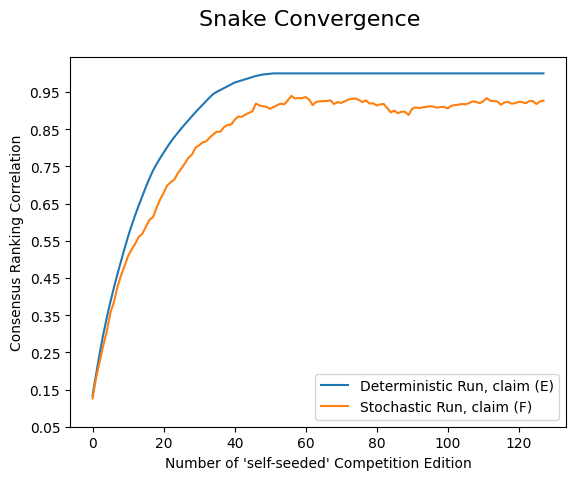

In [3]:
from scipy import stats
import matplotlib.pyplot as plt


fig, axs = plt.subplots()
fig.suptitle('Snake Convergence', fontsize=16)
axs.set_xlabel('Number of \'self-seeded\' Competition Edition')
axs.set_ylabel('Consensus Ranking Correlation')

axs.plot(results_E, label='Deterministic Run, claim (E)')
axs.plot(results_F, label='Stochastic Run, claim (F)')

yticks = [i/100 for i in range(5, 101, 10)]
axs.set_yticks(yticks)
axs.legend()
plt.show()

### Figure 4.5
The graph shows Kendalltau rank correlation between the final placement of a snake edition and the consensus ranking. The k-th edition (on the x-axis) was seeded with the final placement of the (k-1)-th edition. In orange, a simulation run using the probabilistic LogSolver solver, in blue the deterministic BetterWin solver. Runs are performed with n=64 players of constant levels - BetterWin solver. We can see that indeed, after n editions (64) the correlation is at 1, the final standing is the consensus ranking. In the probabilistic case, we can observe a similar converged state, noisy due to the unpredictable nature of a balanced game. A 0.95 rank correlation is a value close to what is observed for any other scheduler (c.f. Figure 4.1 ).


### Conclusion
The claim that the format sorts itself - ranks the player based on their strength is correct. Both in the context of deterministic and stochastic simulation. The players are sorted accordingly to the consensus ranking without external intervention.

**Skilled Based Scheduler**

The question that I address next is not if the Snake Scheduler is a skilled based competition - By design it is meant to be one. What we are interested in here is whether ranking algorithms and the format have a similar notion of balanced game/matching/pairing.


#### Metric

OpenSkill has a *predict_draw* method to measure game balance, TrueSkill provides a *quality_1vs1* method. For Elo and Glicko I implemented the quality_1vs1() from https://github.com/sublee/glicko/blob/master/glicko.py. All theses approach are wrapped in the utils.metric.game_quality function.

In [4]:
from rstt import BasicOS, BasicElo, BasicGlicko
from rstt.ranking import Elo, Glicko
from openskill.models import PlackettLuce
from utils.commons import TS
from utils import game_quality
from utils.tracking import RSSC_RESULT, rssc_data



rankings = [TS('TrueSkill'), BasicOS('PlackettLuce', PlackettLuce()), BasicElo('Elo'), BasicGlicko('Glicko')]
mm_balance = {}

for ranking in rankings:
    ranking.add(groundtruth.players())
    mm_balance[ranking] = rssc(f'Snake (B) - {ranking.name}', ranking, Snake, LogSolver(), depth, game_quality)

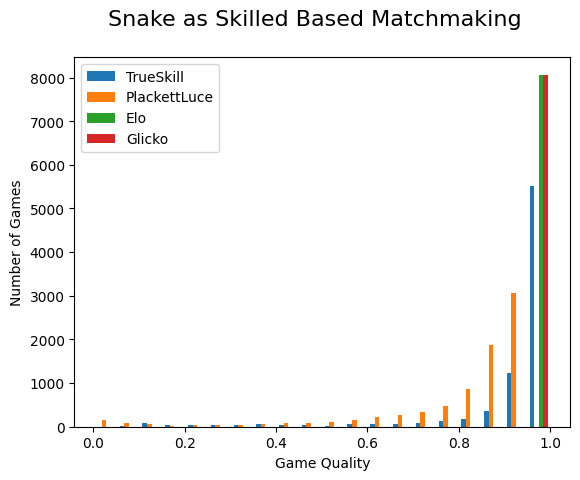

In [5]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots()
fig.suptitle('Snake as Skilled Based Matchmaking', fontsize=16)
axs.set_ylabel('Number of Games')
axs.set_xlabel('Game Quality')


axs.hist([[game for result in mm_balance[r] for game in result] for r in mm_balance.keys()],
         bins=20, histtype='bar', label=[r.name for r in mm_balance.keys()])

axs.legend()
plt.show()

### Figure 4.6: Game quality in the snake format as perceived by different rating systems.

We can see that in the case of Elo and Glicko, each game is of quality approximately 1.0, this means that both opponents have about 50% chance each to win the game. We have extremely balanced games. This is mostly true for PlackettLuce and TrueSkill, but we can note a few games of weaker quality (below 0.8). These two rankings rate players using a Gaussian (mu, sigma). The quality() method is not just a function of the difference in both ratings but also in the absolute value of sigma. Take a close look at the below equations.


    (Eq. 4.1) TrueSkill.quality([[(mu=25, sigma=8.333)], [(mu=25, sigma=8.333)]]) = 0.4619

    (Eq. 4.2) TrueSkill.quality([[(mu=25, sigma=0.789)], [(mu=25, sigma=0.789)]]) = 0.9825


Both equations show the computation of a TrueSkill game quality between two players of identical ratings. In (Eq. 4.1) it is the default rating and in (Eq 4.2) it uses ratings with the default mu value, but a sigma value close to what is observed at the end of the simulation in figure 4.6. As time passes, TrueSkill consider the scheduler’s games more and more balanced.


### Conclusion

The Snake format can be seen as a skilled based scheduler because most games are considered balanced by state-of-the-art rating systems.